We will start by importing libaries we will need

In [12]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


There are two data frames we are interested in both from a website https://www.tomato.gg/
This website is a gaint online source of world of tank data. Offering both player and vehicle data. 
We will scape data from these webpages and turn them into dataframes.

IMPORTANT!!!
There are two main data tables we are interested in the first is generl information the next deals with the tank economy.
The website is updated on a almost weekly basis. This may cause the get request to fail when it is down for maintaince it could also mean the names or labels of revant columns and data are changed. This can be an issue as variable names could be altered making the code not preform as expected.
In order to address this I decided to scape the page once and write the output to a text file. I used the data from this text file in my project.
The text file is up to date as off April 2023 which will suffice for my primary purpose.
Below I have provided the code I used to scape the webpage. 
This may not always work for the reasons stated above this is fine as project is will work with the text file. 
The code below demonstates the inital scaping process.

In [13]:
url = "https://www.tomato.gg/tank-stats/NA"


response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


script = soup.find("script", {"id": "__NEXT_DATA__"})

if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]
    
    
    #This point data was writen into a text file  
    #Intially generalData now just a temp to demonstrate the process
    #It is an array of Json Objects
    with open("temp.txt", "w", encoding='utf-8') as f:

        for entry in initial_data:
            f.write(str(entry) + "\n")
    
else:
    print("Error data not found")
    


In [14]:
url = "https://www.tomato.gg/economics/all"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

script = soup.find("script", {"id": "__NEXT_DATA__"})
if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]['data']

    with open("temp.txt", "w", encoding='utf-8') as f:

        for entry in initial_data:
            f.write(str(entry) + "\n")
    
else:
    print("Error data not found")

We will now contruct the dataframes with the data from the two older text files

In [15]:
with open('rawDataOutput/generalData.txt', 'r') as f:
    text = f.readlines()
    data = []
    for line in text:
        data.append(eval(line))
    generalDf = pd.DataFrame(data)

generalDf


tank_id          name   nation  tier class   
0      60225    Bourrasque   France     8    MT  \
1      50193    Skorpion G  Germany     8    TD   
2      61505   ELC EVEN 90   France     8    LT   
3      45057      SU-130PM     USSR     8    TD   
4      60481  Char Futur 4   France     9    MT   
..       ...           ...      ...   ...   ...   
557    53793         T95E2      USA     8    MT   
558    51313   Å koda T 45    Czech     7    HT   
559    10289       BZ-58-2    China     9    HT   
560    54033    Pz. V/IV A  Germany     5    MT   
561    51201    KV-220-2 T     USSR     5    HT   

                                                 image  battles  winrate   
0    https://api.worldoftanks.com/static/2.66.0/wot...   110271    53.36  \
1    https://api.worldoftanks.com/static/2.66.0/wot...    82120    48.96   
2    https://api.worldoftanks.com/static/2.66.0/wot...    80964    50.58   
3    https://api.worldoftanks.com/static/2.66.0/wot...    77995    49.72   
4    https://api.worldoftanks.com/static/2.66.0/wot...    72969    50.34   
..                                                 ...      ...      ...   
557  https://api.worldoftanks.com/static/2.66.0/wot...       83    49.86   
558  https://api.worldoftanks.com/static/2.66.0/wot...       67    59.85   
559  https://api.worldoftanks.com/static/2.71.0/wot...       45     0.00   
560  https://api.worldoftanks.com/static/2.66.0/wot...        6    65.38   
561  https://api.worldoftanks.com/static/2.66.0/wot...        1     0.00   

     damage  sniper_damage  ...  potential_damage_received   
0      1391            377  ...                       1052  \
1      1264            716  ...                        886   
2       593             99  ...                        761   
3      1386            746  ...                        784   
4      1539            460  ...                       1599   
..      ...            ...  ...                        ...   
557     777            226  ...                       1843   
558    1257            213  ...                       1809   
559    1835            191  ...                       2631   
560     909            127  ...                        712   
561     537              0  ...                       2050   

     base_capture_points  base_defense_points  life_time  survival   
0                   0.48                 0.50        297     27.44  \
1                   0.71                 0.37        341     30.85   
2                   0.97                 0.45        269     23.45   
3                   0.84                 0.44        358     34.90   
4                   0.62                 0.45        316     28.56   
..                   ...                  ...        ...       ...   
557                 1.37                 0.00        309     14.46   
558                 0.10                 0.00        320     29.85   
559                 0.00                 0.00        299     15.56   
560                 0.00                 0.67        226     33.33   
561                 0.00                 0.00        208      0.00   

     distance_traveled   wn8  difference  player_winrate  isPrem  
0                 1812  1656        1.90           51.46    True  
1                 1248  1256       -0.09           49.05    True  
2                 1741  1086        0.30           50.28    True  
3                 1195  1364       -0.02           49.74    True  
4                 1679  1290        0.96           49.38    True  
..                 ...   ...         ...             ...     ...  
557               1428   766        1.06           48.80    True  
558               1200  1515        1.35           58.50    True  
559               1280  1284        0.00            0.00    True  
560               1151  1868        2.59           62.79    True  
561                765   812        0.00            0.00    True  

[562 rows x 32 columns]

In [16]:
with open('rawDataOutput/econData.txt', 'r') as f:
    text = f.readlines()
    data = []
    for line in text:
        data.append(eval(line))
    economicDF = pd.DataFrame(data)

economicDF

tank_id  tier   nation   
0      58625     8     USSR  \
1      51313     7    Czech   
2      43585     8   France   
3      52049     8       UK   
4      56065     8     USSR   
..       ...   ...      ...   
660    62513    10    China   
661     6225    10       UK   
662    51729     3  Germany   
663    46849    10     USSR   
664    17729    10   France   

                                                 image  battles  avg_earnings   
0    https://api.worldoftanks.com/static/2.66.0/wot...      106         86598  \
1    https://api.worldoftanks.com/static/2.66.0/wot...      112         88126   
2    https://api.worldoftanks.com/static/2.66.0/wot...     8905         76992   
3    https://api.worldoftanks.com/static/2.66.0/wot...      702        102353   
4    https://api.worldoftanks.com/static/2.71.0/wot...     2840         82829   
..                                                 ...      ...           ...   
660  https://api.worldoftanks.com/static/2.71.0/wot...     1003         58606   
661  https://api.worldoftanks.com/static/2.66.0/wot...     1589         55666   
662  https://api.worldoftanks.com/static/2.66.0/wot...      799         35285   
663  https://api.worldoftanks.com/static/2.66.0/wot...    19611         67138   
664  https://api.worldoftanks.com/static/2.66.0/wot...     1867         35880   

     avg_profit  avg_ammo_cost  cost_per_shot  avg_repair_cost   
0         59913          14155           1618             4987  \
1         55578          25856           1613             6025   
2         52118           8386            770             4909   
3         50884          32916           3536             6941   
4         50730          19510           2047             6590   
..          ...            ...            ...              ...   
660      -29768          48374           3895            26656   
661      -32234          48503           3681            23100   
662      -36263          67756            378              692   
663      -36446          57214           4543            25952   
664      -36604          43389           3648            18242   

     avg_consumables_cost  earnings_per_minute  profit_per_minute class   
0                    7542                14721              10184    TD  \
1                     665                15255               9621    HT   
2                   11578                18029              12204    LT   
3                   11610                18754               9323    HT   
4                    5997                16563              10144    HT   
..                    ...                  ...                ...   ...   
660                 13345                11100              -5638    HT   
661                 16296                10013              -5798    HT   
662                  3100                 7835              -8052    LT   
663                 20418                12734              -6912    HT   
664                 10851                 6443              -6573    TD   

     isPrem          name  
0      True       ISU-130  
1      True   Å koda T 45  
2      True  EBR 75 FL 10  
3      True   Charlemagne  
4      True     Peregrine  
..      ...           ...  
660    True        113 BO  
661    True        FV215b  
662    True      Pz. II J  
663    True  Obj. 279 (e)  
664   False        Foch B  

[665 rows x 16 columns]

These DF have a lot of data we don't need so we will trim some of the columns we don't need.


In [17]:
print(generalDf.columns)

generalDf = generalDf.drop(columns='image')
generalDf = generalDf.drop(columns='sniper_damage')
generalDf = generalDf.drop(columns='frags')
generalDf = generalDf.drop(columns='tracking_assist')
generalDf = generalDf.drop(columns='shots_fired')
generalDf = generalDf.drop(columns='direct_hits')
generalDf = generalDf.drop(columns='penetrations')
generalDf = generalDf.drop(columns='damage_received_from_invisible')
generalDf = generalDf.drop(columns='potential_damage_received')
generalDf = generalDf.drop(columns='base_capture_points')
generalDf = generalDf.drop(columns='base_defense_points')
generalDf = generalDf.drop(columns='life_time')
generalDf = generalDf.drop(columns='distance_traveled')
generalDf = generalDf.drop(columns='difference')


print(generalDf.columns)


Index(['tank_id', 'name', 'nation', 'tier', 'class', 'image', 'battles',
       'winrate', 'damage', 'sniper_damage', 'frags', 'spotting_assist',
       'tracking_assist', 'shots_fired', 'direct_hits', 'penetrations',
       'hit_rate', 'pen_rate', 'spots', 'damage_blocked', 'damage_received',
       'damage_received_from_invisible', 'potential_damage_received',
       'base_capture_points', 'base_defense_points', 'life_time', 'survival',
       'distance_traveled', 'wn8', 'difference', 'player_winrate', 'isPrem'],
      dtype='object')
Index(['tank_id', 'name', 'nation', 'tier', 'class', 'battles', 'winrate',
       'damage', 'spotting_assist', 'hit_rate', 'pen_rate', 'spots',
       'damage_blocked', 'damage_received', 'survival', 'wn8',
       'player_winrate', 'isPrem'],
      dtype='object')


In [18]:
print(economicDF.columns)

economicDF = economicDF.drop(columns='image')

print(economicDF.columns)


Index(['tank_id', 'tier', 'nation', 'image', 'battles', 'avg_earnings',
       'avg_profit', 'avg_ammo_cost', 'cost_per_shot', 'avg_repair_cost',
       'avg_consumables_cost', 'earnings_per_minute', 'profit_per_minute',
       'class', 'isPrem', 'name'],
      dtype='object')
Index(['tank_id', 'tier', 'nation', 'battles', 'avg_earnings', 'avg_profit',
       'avg_ammo_cost', 'cost_per_shot', 'avg_repair_cost',
       'avg_consumables_cost', 'earnings_per_minute', 'profit_per_minute',
       'class', 'isPrem', 'name'],
      dtype='object')


Lets start by examing the average win rates betweeen premium and non premium tanks

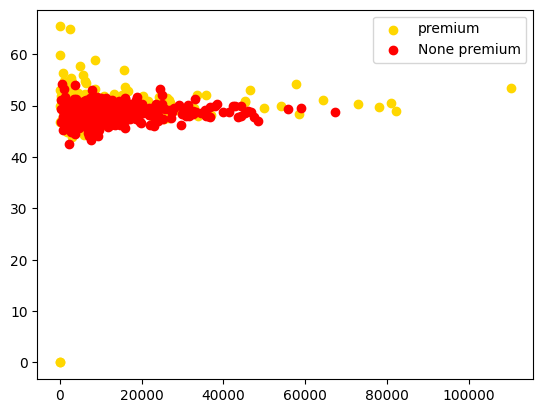

In [19]:
premiumGeneral = generalDf[generalDf['isPrem'] == True]
stdGeneral = generalDf[generalDf['isPrem'] == False]

plt.scatter(premiumGeneral['battles'], premiumGeneral['winrate'], label = "premium", color = 'gold')
plt.scatter(stdGeneral['battles'], stdGeneral['winrate'], label = "None premium", color = 'red')
plt.legend()
plt.show()

Looking at this plot we see that there is an out liner which alters the shape of the graph.
Indeed the number of battles can skew results greatly. For example if a tank is only played in 3 games and wins all 3 games it would have a 100% win rate. This is not quite telling of the tanks overall preformance. As such lets chop off tanks that have less than 1000 games played total.
Lets also increase tranparency to better see the data.

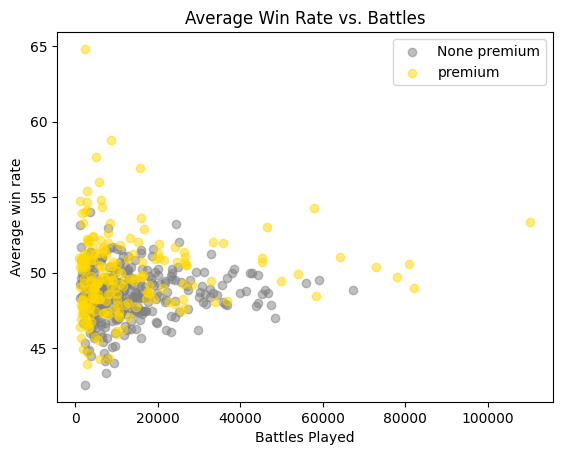

In [20]:
tempDf = generalDf[generalDf['battles'] >= 1000]
premiumGeneral = tempDf[tempDf['isPrem'] == True]
stdGeneral = tempDf[tempDf['isPrem'] == False]


plt.scatter(stdGeneral['battles'], stdGeneral['winrate'], label = "None premium", color = 'gray', alpha=0.5)
plt.scatter(premiumGeneral['battles'], premiumGeneral['winrate'], label = "premium", color = 'gold', alpha=0.5)

plt.title('Average Win Rate vs. Battles')
plt.xlabel('Battles Played')
plt.ylabel('Average win rate')

plt.legend()
plt.show()


Lets now look at how tank economies work.
It is known that premium tanks earn more money per battle compared to standard ones

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


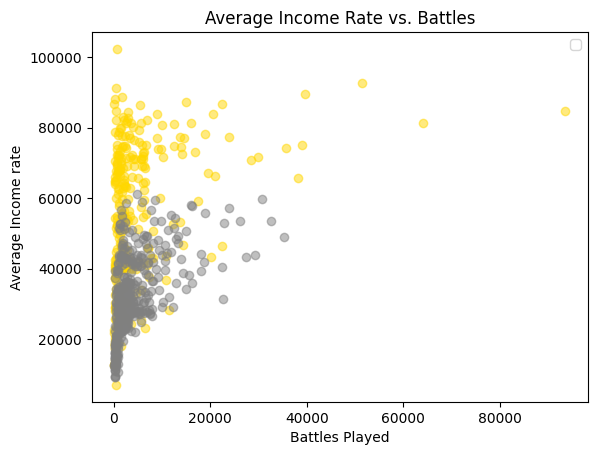

In [21]:
premiumEcon = economicDF[economicDF['isPrem'] == True]
stdEcon = economicDF[economicDF['isPrem'] == False]

plt.scatter(premiumEcon['battles'], premiumEcon['avg_earnings'], color = 'gold', alpha=0.5)
plt.scatter(stdEcon['battles'], stdEcon['avg_earnings'], color = 'gray', alpha=0.5)


plt.title('Average Income Rate vs. Battles')
plt.xlabel('Battles Played')
plt.ylabel('Average Income rate')

plt.legend()
plt.show()